In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

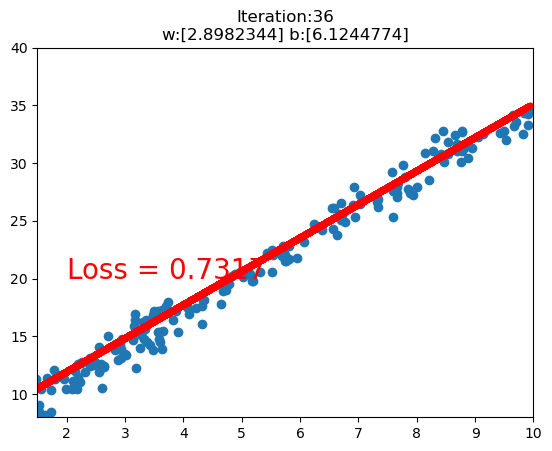

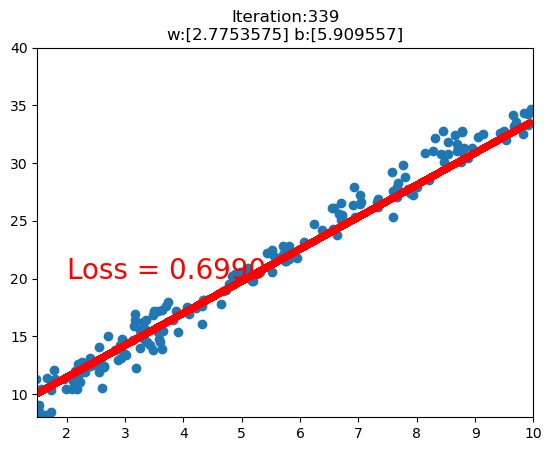

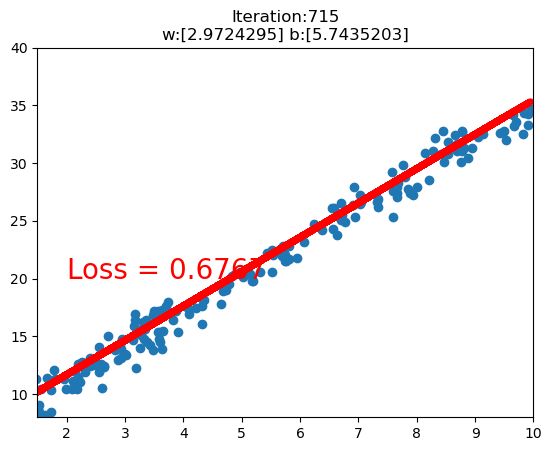

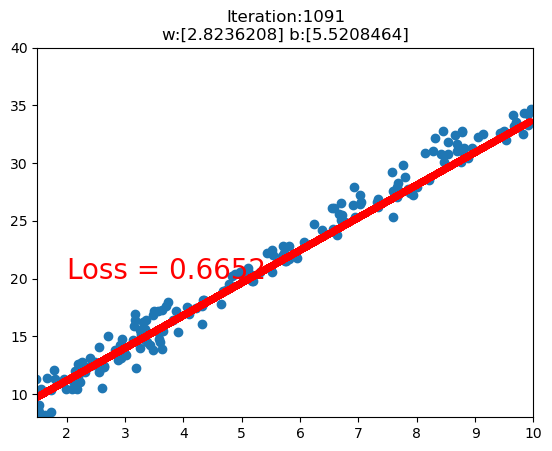

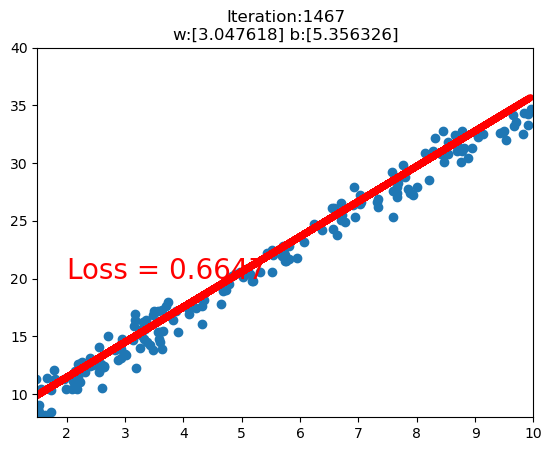

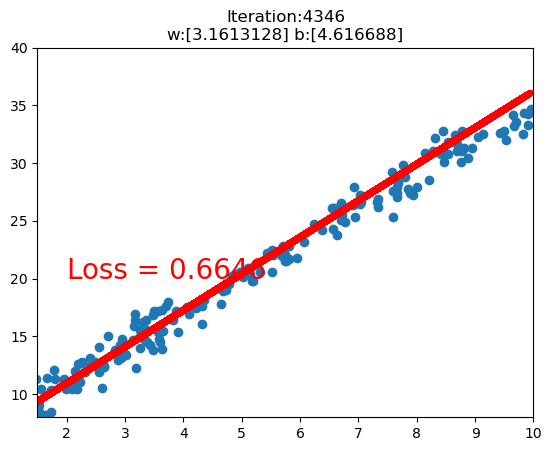

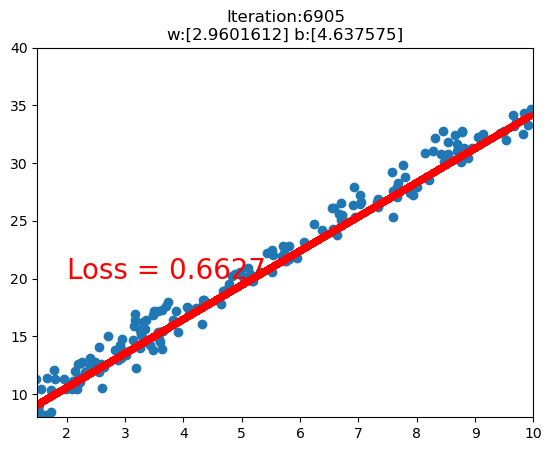

In [6]:
lr = 0.01
best_loss = float("inf")

x = torch.rand(200,1)*10
y = 3*x + (5 + torch.randn(200,1))

w = torch.randn((1),requires_grad = True)
b = torch.randn((1),requires_grad = True)

for iteration in range(10000):
    wx = torch.mul(w,x)
    y_pred = torch.add(wx,b)
    
    loss = (0.5*(y-y_pred)**2).mean()
    loss.backward()
    
    
    current_loss = loss.item()
    if current_loss<best_loss:
        best_loss = current_loss
        best_w = w
        best_b = b
        
        if loss.data.numpy()<3:
            plt.scatter(x.data.numpy(),y.data.numpy())
            plt.plot(x.data.numpy(),y_pred.data.numpy(),'r-',lw = 5)
            plt.text(2,20,'Loss = %.4f'%loss.data.numpy(),fontdict = {'size':20,'color':'red'})
            plt.xlim(1.5,10)
            plt.ylim(8,40)
            plt.title("Iteration:{}\nw:{} b:{}".format(iteration,w.data.numpy(),b.data.numpy()))
            
            plt.pause(0.5)
             
            if loss.data.numpy()<0.55:
                print(w.data.numpy())
                break
    b.data.sub_(lr*b.grad)
    w.data.sub_(lr*w.grad)
            
    